## YOLO Model Inference

We have the trained models present now, we can run a

In [1]:
from ultralytics import YOLO, FastSAM
import cv2
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Load your trained model
DEVICE = 'mps' if torch.backends.mps.is_available() else 'cpu'
IMAGE_PATH = './img/bookshelf_2.jpeg'
model = YOLO('./models/30.25-run/best.pt').to(DEVICE)
sam_model = FastSAM('./models/FastSAM-s.pt').to(DEVICE)

# Run inference
results = model(IMAGE_PATH)


image 1/1 /Users/kj3moraes/Projects/Coding/biblioteca/notebooks/img/bookshelf_2.jpeg: 608x800 20 books, 290.0ms
Speed: 13.0ms preprocess, 290.0ms inference, 796.9ms postprocess per image at shape (1, 3, 608, 800)


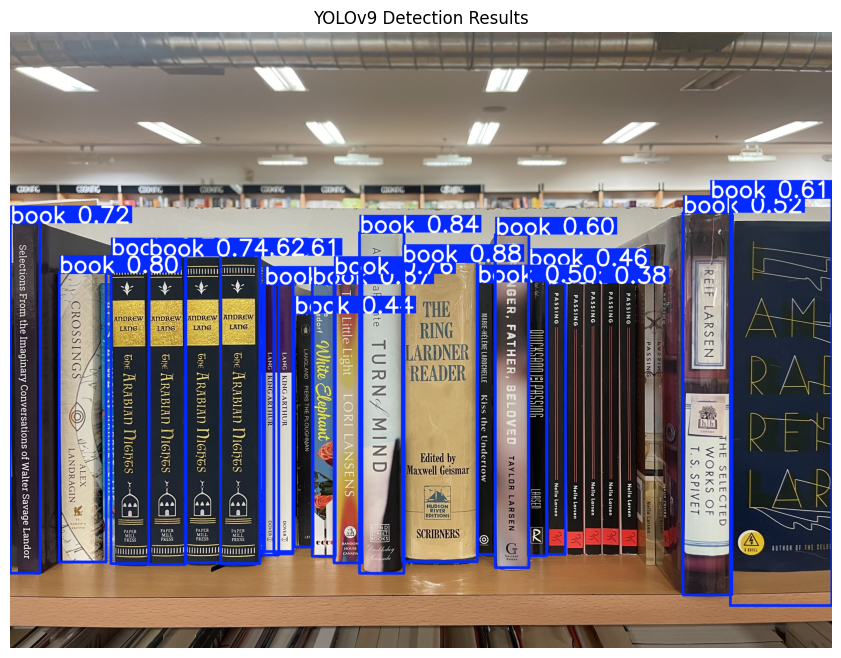

In [3]:
# Get the annotated image
result = results[0]
bboxes = result.boxes.xyxy.cpu().numpy()
annotated_image = result.plot()  # Returns BGR image with boxes

# Convert BGR to RGB for matplotlib
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(12, 8))
plt.imshow(annotated_image_rgb)
plt.axis('off')
plt.title('YOLOv9 Detection Results')
plt.show()

We can use instance segmentation using FastSAM to get all the book spines or books in the image

In [ ]:
sam_results = sam_model(IMAGE_PATH, bboxes=bboxes)

# Get the annotated image
annotated_image = sam_results[0].plot()  # Returns BGR image with boxes

# Convert BGR to RGB for matplotlib
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(12, 8))
plt.imshow(annotated_image_rgb)
plt.axis('off')
plt.title('FastSAM Detection Results')
plt.show()



WARNING ⚠️ NMS time limit 2.050s exceeded


RuntimeError: Invalid buffer size: 10.31 GB